Top 10 countries with the highest total earthquake deaths are:
CHINA: 2,106,524
TURKEY: 1,008,863
IRAN: 761,654
SYRIA: 487,726
ITALY: 423,280
HAITI: 323,782
JAPAN: 319,443
AZERBAIJAN: 319,251
INDONESIA: 282,838
ARMENIA: 189,000


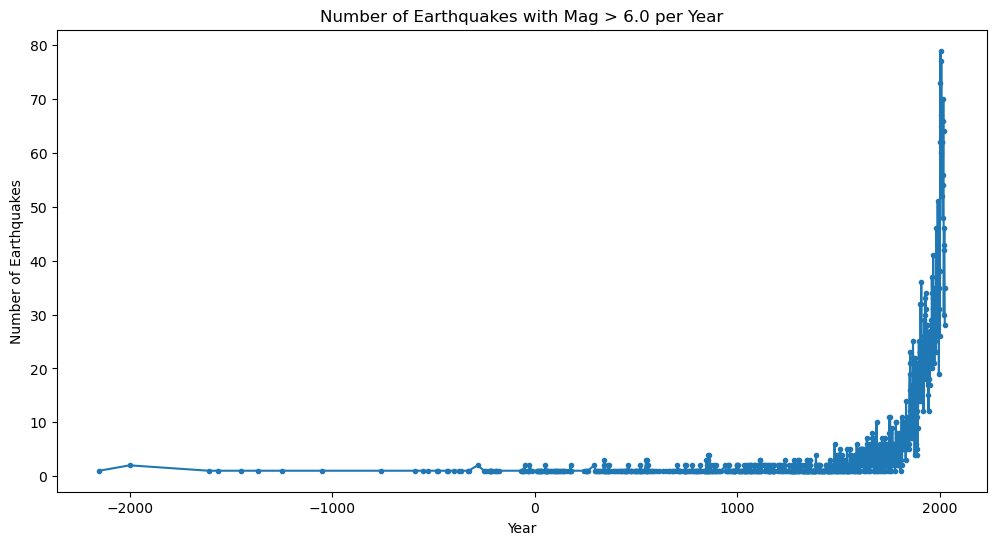


Earthquake counts and largest quake date by country (descending):
                              Country  Total        Date
52                            IRELAND      1        None
122                          KIRIBATI      1   1905-6-30
106  SAINT VINCENT AND THE GRENADINES      1        None
104                          BARBADOS      1        None
107                  FRENCH POLYNESIA      1   1848-7-12
..                                ...    ...         ...
9                              TURKEY    358  1939-12-26
7                                IRAN    388   856-12-22
72                          INDONESIA    421  2004-12-26
33                              JAPAN    424   2011-3-11
14                              CHINA    623   1668-7-25

[158 rows x 3 columns]


In [14]:
import pandas as pd
from matplotlib import pyplot as plt

Sig_Eqs = pd.read_csv(r'E:\\Users\\ZLB\\Desktop\\earthquakes-2025-11-12_01-07-47_+0800.tsv', sep='\t')

# 将列转为数值类型
Sig_Eqs['Total Deaths'] = pd.to_numeric(Sig_Eqs['Total Deaths'], errors='coerce')
Sig_Eqs['Year'] = pd.to_numeric(Sig_Eqs['Year'], errors='coerce')
Sig_Eqs['Mag'] = pd.to_numeric(Sig_Eqs['Mag'], errors='coerce')

# 筛选有效数据
valid_data = Sig_Eqs[
    (Sig_Eqs['Total Deaths'].notna()) &
    (Sig_Eqs['Total Deaths'] >= 0) &
    (Sig_Eqs['Country'].notna()) &
    (Sig_Eqs['Country'] != '') &
    (Sig_Eqs['Year'] >= -2150)  
]

# 按国家汇总死亡人数
deaths_by_country = valid_data.groupby('Country')['Total Deaths'].sum().sort_values(ascending=False)

# 取前10名
top_10 = deaths_by_country.head(10)

# 打印结果
print("Top 10 countries with the highest total earthquake deaths are:")
for country, deaths in top_10.items():
    print(f"{country}: {int(deaths):,}")

# 只保留 Mag > 6.0 的数据
Sig_Eqs_filtered = Sig_Eqs[Sig_Eqs['Mag']> 6.0] 

# 按年份统计地震次数
yearly_counts = Sig_Eqs['Year'].value_counts().sort_index()

# 绘图
plt.figure(figsize=(12, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', markersize=3)
plt.title("Number of Earthquakes with Mag > 6.0 per Year")
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.show()

# 只保留 Year >= -2150 的记录（即公元前2150年及之后）
Sig_Eqs = Sig_Eqs[Sig_Eqs['Year'] >= -2150]

# 定义函数
def CountEq_LargestEq(country, data):
    sub = data[data['Country'] == country]
    if sub.empty:
        return 0, None
    total = len(sub)
    
    # 如果 Mag 全是 NaN，无法找最大值
    if sub['Mag'].isna().all():
        return total, None

    # 找最大震级的行（自动跳过 NaN）
    max_idx = sub['Mag'].idxmax()
    row = sub.loc[max_idx]
  
    y, m, d = row['Year'], row['Mo'], row['Dy']
    date = f"{int(y)}-{int(m)}-{int(d)}" if pd.notna(m) and pd.notna(d) else str(int(y))
    return total, date

results = [
    (*CountEq_LargestEq(c, Sig_Eqs), c)
    for c in Sig_Eqs['Country'].dropna().unique()]

result_Sig_Eqs = pd.DataFrame(results, columns=['Total', 'Date', 'Country']) \
              .sort_values('Total', ascending=False)

print("\nEarthquake counts and largest quake date by country :")
print(result_Sig_Eqs[['Country', 'Total', 'Date']])

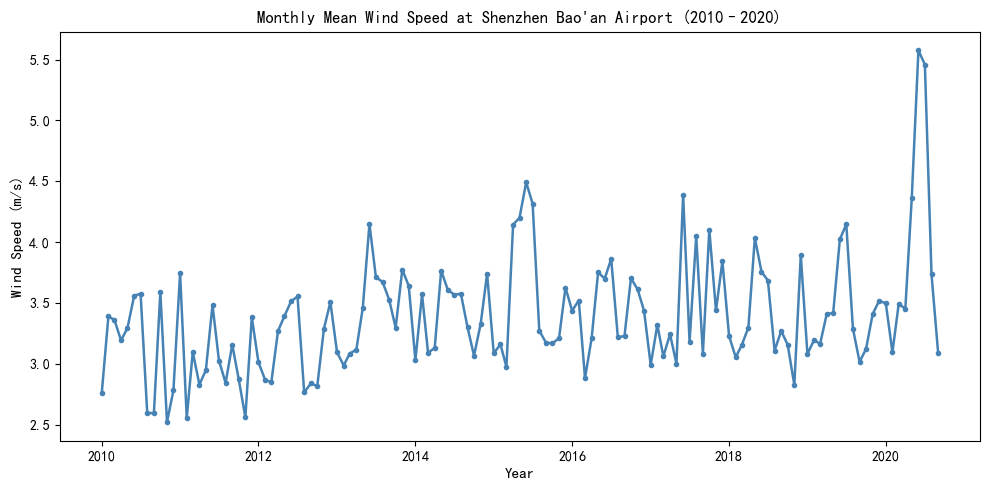

Monthly Wind Speed Statistics (2010–2020):
count    129.000000
mean       3.384938
std        0.489438
min        2.519553
25%        3.084763
50%        3.294479
75%        3.607066
max        5.575800
Name: wind_speed_mps, dtype: float64

数据筛选说明：
1. 数据来自 NOAA ISD（Bao'an Airport, Station ID 2281305）。
2. 从 WND 列中提取第4个字段（风速×10），除以10得到 m/s。
3. 删除风速≥999 和缺失值。
4. 仅保留 2010–2020 年间的记录。
5. 按月份平均以平滑小时级波动。



In [17]:
import pandas as pd
import matplotlib.pyplot as plt

#读取数据 
df = pd.read_csv(r'E:\Users\ZLB\Desktop\2281305.csv', low_memory=False)

#提取风速（WND列） 
def parse_wind_speed(wnd_str):
    """从 NOAA WND 列中提取风速（单位：m/s）"""
    try:
        parts = wnd_str.split(",")
        speed = float(parts[3]) / 10.0
        if speed >= 999:  # 999 表示缺测
            return None
        return speed
    except:
        return None

df["wind_speed_mps"] = df["WND"].apply(parse_wind_speed)
df = df.dropna(subset=["wind_speed_mps"])

#处理日期 
df["DATE"] = pd.to_datetime(df["DATE"], errors="coerce")
df = df.dropna(subset=["DATE"])
df = df.set_index("DATE")

#只保留 2010–2020 年的数据
df = df.loc["2010":"2020"]

#按月份求平均风速
df["YearMonth"] = df.index.to_period("M")
monthly_mean = df.groupby("YearMonth")["wind_speed_mps"].mean().reset_index()
monthly_mean["YearMonth"] = monthly_mean["YearMonth"].dt.to_timestamp()

#绘制月平均风速
plt.figure(figsize=(10,5))
plt.plot(monthly_mean["YearMonth"], monthly_mean["wind_speed_mps"], 
         color="steelblue", linewidth=1.8, marker='o', markersize=3)

plt.title("Monthly Mean Wind Speed at Shenzhen Bao'an Airport (2010–2020)", fontsize=12)
plt.xlabel("Year", fontsize=11)
plt.ylabel("Wind Speed (m/s)", fontsize=11)
plt.tight_layout()
plt.show()

# 统计信息 
print("Monthly Wind Speed Statistics (2010–2020):")
print(monthly_mean["wind_speed_mps"].describe())

#数据筛选说明
print("""
数据筛选说明：
1. 数据来自 NOAA ISD（Bao'an Airport, Station ID 2281305）。
2. 从 WND 列中提取第4个字段（风速×10），除以10得到 m/s。
3. 删除风速≥999 和缺失值。
4. 仅保留 2010–2020 年间的记录。
5. 按月份平均以平滑小时级波动。
""")


 NH4-N_outlet 统计结果：
均值: 2.460
中位数: 3.203
标准差: 1.635
最小值: 0.050
最大值: 4.250


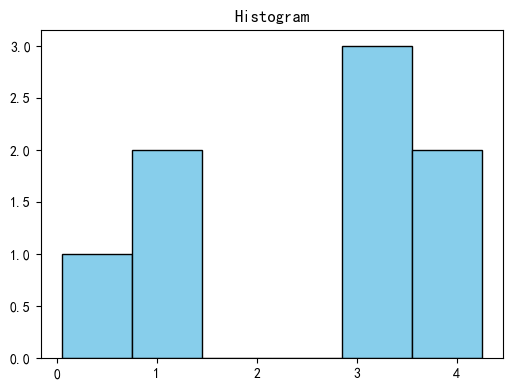

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#读取数据并清理 
# 读取数据
df = pd.read_excel( r'E:\Users\ZLB\Desktop\VS Code Project\Plot\Column_Measured.xlsx', sheet_name="A.N1")

# 去除空值或非数值
df = df.dropna(how="all")
df = df.loc[:, ~df.columns.str.contains('comment|unit', case=False, na=False)]

# 绘制某个变量的时间序列 
variable = "NH4-N_outlet"
# 自动筛选出“列名能转成数字”的列 
date_cols = []
for col in df.columns[1:]:
    try:
        float(col)
        date_cols.append(col)
    except ValueError:
        continue

dates = np.array(date_cols, dtype=float)
values = df[df.iloc[:, 0] == variable][date_cols].iloc[0].astype(float)

#  统计检验
print(f"\n {variable} 统计结果：")
print(f"均值: {values.mean():.3f}")
print(f"中位数: {values.median():.3f}")
print(f"标准差: {values.std():.3f}")
print(f"最小值: {values.min():.3f}")
print(f"最大值: {values.max():.3f}")

# 直方图 
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(values, bins=6, color='skyblue', edgecolor='black')
plt.title("Histogram")
plt.tight_layout()
plt.show()